# 1. Water Consumer Data test models

## 1.1. Initialization

In [1]:
from IPython.display import display
import pandas as pd

df_train = pd.read_csv('src/train.csv')
df_train

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,domestic,0,MOGV36480546611521,Installation_zone 1
1,2013,1,industrial,5,BECS02817768252637,Installation_zone 2
2,2013,1,domestic,6,VRFW65577141436242,Installation_zone 2
3,2013,1,domestic,1,QLLI18662653137621,Installation_zone 2
4,2013,1,domestic,13,HYUO61823402850645,Installation_zone 2
...,...,...,...,...,...,...
329970,2020,12,domestic,0,ZSOE03393580274296,Installation_zone 2
329971,2020,12,rural domestic,0,RVZG94535208799772,Installation_zone 47
329972,2020,12,rural domestic,0,DWGA69725679861554,Installation_zone 7
329973,2020,12,rural domestic,0,VJDC45865594518045,Installation_zone 32


## 2. Training Tests

### 2.0. Pré processing

In [2]:
from numpy import random

SEED = 42
random.seed(SEED)

In [3]:
from datetime import datetime

df = df_train.copy()
map_names = {
    'Year': 'year',
    'Month': 'month',
    'Consumer_type': 'consumer_type',
    'Consumption': 'consumption',
    'Consumer_number': 'consumer_number',
    'Installation_zone': 'installation_zone',
}
df = df.rename(columns=map_names)
df = df.drop(columns=['consumer_number'])
df.installation_zone = df.installation_zone.str.replace('Installation_zone ', '').astype(int)
# df['age'] = datetime.now().year - df.year
# df = df.drop(columns=['year'])

Y = df.consumer_type
X = df.drop(columns=['consumer_type'])

X

,year,month,consumption,installation_zone
0,2013,1,0,1
1,2013,1,5,2
2,2013,1,6,2
3,2013,1,1,2
4,2013,1,13,2
...,...,...,...,...
329970,2020,12,0,2
329971,2020,12,0,47
329972,2020,12,0,7
329973,2020,12,0,32


In [4]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y)

print('Train size: ', len(x_train))
print('Test size: ', len(x_test))


Train size:  247481
Test size:  82494


In [5]:
# smoteenn
from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN(random_state=SEED)
x_balanced, y_balanced = smoteenn.fit_resample(x_train, y_train)

print('Balanced size: ', len(x_balanced))

Balanced size:  443736


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_balanced = scaler.transform(x_balanced)

### 2.1 Dummy Classifier

In [7]:
# dummy classifier
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy='most_frequent')

dummy_model.fit(x_train, y_train)
y_pred = dummy_model.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dummy_accuracy = accuracy_score(y_test, y_pred)*100
dummy_precision = precision_score(y_test, y_pred, average='macro')*100
dummy_recall = recall_score(y_test, y_pred, average='macro')*100
dummy_f1 = f1_score(y_test, y_pred, average='macro')*100

print(f'Accuracy: {dummy_accuracy:.2f}%')
print(f'Precision: {dummy_precision:.2f}%')
print(f'Recall: {dummy_recall:.2f}%')
print(f'F1: {dummy_f1:.2f}%')


/run/media/guedes/HD/ipb/ml4ds/water-consumption/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 71.57%
Precision: 10.22%
Recall: 14.29%
F1: 11.92%


### 2.2. Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and train the logistic regression model
logic_regression_model = LogisticRegression(solver='liblinear')
logic_regression_model.fit(x_balanced, y_balanced)

# Make predictions on the test set
y_pred = logic_regression_model.predict(x_test)

# Evaluate the model
logic_regression_accuracy = accuracy_score(y_test, y_pred)*100
logic_regression_precision = precision_score(y_test, y_pred, average='macro')*100
logic_regression_recall = recall_score(y_test, y_pred, average='macro')*100
logic_regression_f1 = f1_score(y_test, y_pred, average='macro')*100

# confusion = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {logic_regression_accuracy:.2f}%')
print(f'Precision: {logic_regression_precision:.2f}%')
print(f'Recall: {logic_regression_recall:.2f}%')
print(f'F1: {logic_regression_f1:.2f}%')


/run/media/guedes/HD/ipb/ml4ds/water-consumption/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 89.03%
Precision: 32.89%
Recall: 28.52%
F1: 28.28%


### 2.3. SVM

In [9]:
# from sklearn.svm import SVC

# model = SVC(kernel='linear')
# model.fit(x_train, y_train)

# y_pred = model.predict(x_test)

# svm_accuracy = accuracy_score(y_test, y_pred)*100
# svm_precision = precision_score(y_test, y_pred, average='macro')*100
# svm_recall = recall_score(y_test, y_pred, average='macro')*100
# svm_f1 = f1_score(y_test, y_pred, average='macro')*100

# print(f'Accuracy: {svm_accuracy:.2f}%')
# print(f'Precision: {svm_precision:.2f}%')
# print(f'Recall: {svm_recall:.2f}%')
# print(f'F1: {svm_f1:.2f}%')


### 2.4. Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

decision_tree_model = DecisionTreeClassifier(max_depth=3)
decision_tree_model.fit(x_balanced, y_balanced)
y_pred = decision_tree_model.predict(x_test)

decision_tree_accuracy = accuracy_score(y_test, y_pred)*100
decision_tree_precision = precision_score(y_test, y_pred, average='macro')*100
decision_tree_recall = recall_score(y_test, y_pred, average='macro')*100
decision_tree_f1 = f1_score(y_test, y_pred, average='macro')*100

print(f'Accuracy: {decision_tree_accuracy:.2f}%')
print(f'Precision: {decision_tree_precision:.2f}%')
print(f'Recall: {decision_tree_recall:.2f}%')
print(f'F1: {decision_tree_f1:.2f}%')


/run/media/guedes/HD/ipb/ml4ds/water-consumption/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 87.57%
Precision: 37.67%
Recall: 32.81%
F1: 32.18%


### 2.5. Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

random_forest_model = RandomForestClassifier(max_depth=3)
random_forest_model.fit(x_balanced, y_balanced)

y_pred = random_forest_model.predict(x_test)

random_forest_accuracy = accuracy_score(y_test, y_pred)*100
random_forest_precision = precision_score(y_test, y_pred, average='macro')*100
random_forest_recall = recall_score(y_test, y_pred, average='macro')*100
random_forest_f1 = f1_score(y_test, y_pred, average='macro')*100

print(f'Accuracy: {random_forest_accuracy:.2f}%')
print(f'Precision: {random_forest_precision:.2f}%')
print(f'Recall: {random_forest_recall:.2f}%')
print(f'F1: {random_forest_f1:.2f}%')


/run/media/guedes/HD/ipb/ml4ds/water-consumption/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 89.48%
Precision: 32.40%
Recall: 29.56%
F1: 29.27%


### 2.6. KNeighbors Classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_balanced, y_balanced)

y_pred = knn_model.predict(x_test)

knn_accuracy = accuracy_score(y_test, y_pred)*100
knn_precision = precision_score(y_test, y_pred, average='macro')*100
knn_recall = recall_score(y_test, y_pred, average='macro')*100
knn_f1 = f1_score(y_test, y_pred, average='macro')*100

print(f'Accuracy: {knn_accuracy:.2f}%')
print(f'Precision: {knn_precision:.2f}%')
print(f'Recall: {knn_recall:.2f}%')
print(f'F1: {knn_f1:.2f}%')


Accuracy: 87.48%
Precision: 38.22%
Recall: 33.42%
F1: 34.33%


### 2.7. Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_balanced, y_balanced)

y_pred = naive_bayes_model.predict(x_test)

naive_bayes_accuracy = accuracy_score(y_test, y_pred)*100
naive_bayes_precision = precision_score(y_test, y_pred, average='macro')*100
naive_bayes_recall = recall_score(y_test, y_pred, average='macro')*100
naive_bayes_f1 = f1_score(y_test, y_pred, average='macro')*100

print(f'Accuracy: {naive_bayes_accuracy:.2f}%')
print(f'Precision: {naive_bayes_precision:.2f}%')
print(f'Recall: {naive_bayes_recall:.2f}%')
print(f'F1: {naive_bayes_f1:.2f}%')

Accuracy: 88.35%
Precision: 35.35%
Recall: 28.63%
F1: 28.40%


## 3. Comparing

In [14]:
data = {
    'method': ['dummy', 'logistic regression', 'decision tree', 'random forest', 'knn', 'naive bayes'],
    'accuracy': [dummy_accuracy, logic_regression_accuracy, decision_tree_accuracy, random_forest_accuracy, knn_accuracy, naive_bayes_accuracy],
    'precision': [dummy_precision, logic_regression_precision, decision_tree_precision, random_forest_precision, knn_precision, naive_bayes_precision],
    'recall': [dummy_recall, logic_regression_recall, decision_tree_recall, random_forest_recall, knn_recall, naive_bayes_recall],
    'f1': [dummy_f1, logic_regression_f1, decision_tree_f1, random_forest_f1, knn_f1, naive_bayes_f1]
}

df_results = pd.DataFrame(data)
df_results

,method,accuracy,precision,recall,f1
0,dummy,71.571266,10.224467,14.285714,11.918623
1,logistic regression,89.030717,32.894960,28.523358,28.281619
2,decision tree,87.573642,37.665198,32.809951,32.183031
3,random forest,89.476810,32.404391,29.555406,29.267079
4,knn,87.481514,38.219022,33.422712,34.331111
5,naive bayes,88.349456,35.353991,28.628252,28.398125


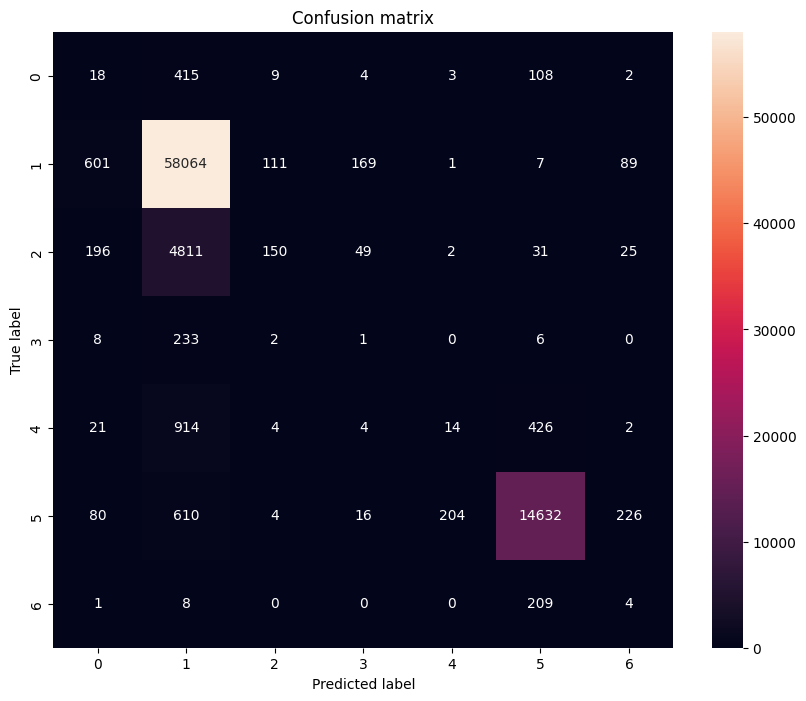

In [15]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
